In [ ]:
# importing necessary libraries for deep learning
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# load the training and testing datasets from csv files
train_df = pd.read_csv("mnist_train.csv")
test_df = pd.read_csv("mnist_test.csv")
X_train = train_df.iloc[:,1:].values
y_train = train_df.iloc[:,0].values
X_test = test_df.iloc[:,1:].values
y_test = test_df.iloc[:,0].values
# normalizing the pixel values to be between 0 and 1 because it helps the neural network converge faster during training
X_train = X_train / 255.0
X_test = X_test / 255.0
# convert the numpy arrays into pyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [ ]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

In [ ]:
class FCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # input layer has 784 input features(28x28 pixels) which are being flashed to 128 neurons
        self.fc1 = nn.Linear(784, 128)
        # Used the ReLU activation function
        self.relu = nn.ReLU()
        # output layer has 10 output classes corresponding to 128 neurons
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        #passing input through the first layer 
        x = self.relu(self.fc1(x))
        #passing the result to output layer
        x = self.fc2(x)
        return x
model = FCNN()

In [ ]:
# define the loss function 
criterion = nn.CrossEntropyLoss()
# define the optimizer (Adam) which has a learning rate of 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 9
for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        # forward pass will compute the ouput of the input layer
        outputs = model(images)
        # calculating the loss between predicted outputs and actual labels
        loss = criterion(outputs, labels)
        # backward pass will compute the gradient of the loss with regard to model parameter
        loss.backward()
        # update model parameters
        optimizer.step()
        # add the total loss for the epoch
        total_loss += loss.item()
    # returning the total loss for the current epoch
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

Epoch 1, Loss: 316.3902
Epoch 2, Loss: 145.4437
Epoch 3, Loss: 101.6413
Epoch 4, Loss: 76.5394
Epoch 5, Loss: 60.1186
Epoch 6, Loss: 48.1511
Epoch 7, Loss: 39.4120
Epoch 8, Loss: 31.9722
Epoch 9, Loss: 27.0199


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        # let model predict the test batch
        outputs = model(images)
        # get the class index with the highest probability
        _, predicted = torch.max(outputs, 1)
        # update the total number of samples
        total += labels.size(0)
        # update the number of correct predictions
        correct += (predicted == labels).sum().item()
# the overall accuracy of the set
print("Test Accuracy:", 100 * correct / total, "%")

Test Accuracy: 97.87 %


In [ ]:
# get the weights from the first fully connected layer and convert them to a numpy array
weights = model.fc1.weight.data.numpy()
# return the shape of the weights matrix
print(weights.shape)

(128, 784)


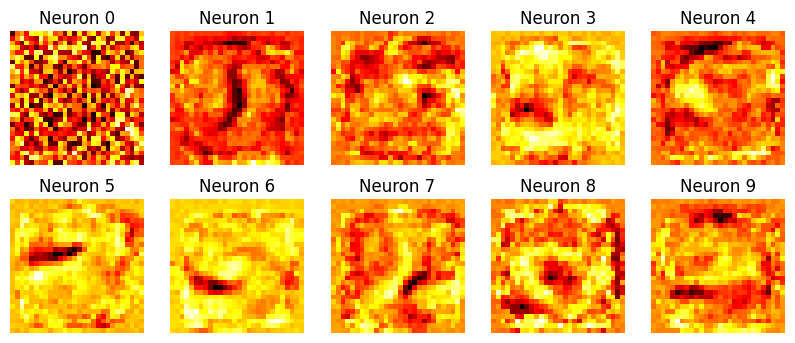

In [ ]:
# creating a figure with a 2x5 grid of subplots to display results for 10 neurons
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
# iterate over each subplot axis to plot the corresponding neuron's weights
for i, ax in enumerate(axes.flat):
    w = weights[i].reshape(28, 28)
    ax.imshow(w, cmap='hot')
    ax.axis('off')
    ax.set_title(f"Neuron {i}")
plt.show()